# Viculación: Segmentación de Estudiantes

 ## Names: Edgar Munoz Abad

## Carga de datos y librerias

In [1]:
 ## Carga de datos: Luego de ordenar los datos en un solo archivo se procede 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
path='data.xlsx'
df = pd.read_excel(path)


In [3]:
# mostrar la data
df.head()

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
0,2.250537e+09,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2
1,2.250537e+09,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2
2,2.250538e+09,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NaN,NaN,INICIAL 2
3,2.250466e+09,GOYES VILLALTA LUIS AARON,2017-12-05,SI,INTELECTUAL,0.36,1RO EGB
4,1.352713e+09,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,SI,FISICA,0.85,1RO EGB


## Procesamiento

En esta seccion se procesara la data de cada una de las columnas. Al tener poca data no es faltible eliminar la data, si no q se aplicara tecnicas para autorellenar los valores faltante

### Transformacion de variables

In [4]:

# Cambiar a str las cedulas
df['CEDULA ESTUDIANTE '] = df['CEDULA ESTUDIANTE '].astype(str)

print(df.dtypes)
df.head()



#df.to_csv('data_clean.csv', index=False)

CEDULA ESTUDIANTE                            object
APELLIDOS  Y NOMBRES                         object
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    datetime64[ns]
TIENE CARNE \nSI/NO                          object
TIPOD                                        object
PORCENTAJE\n%                                object
GRADO O CURSO\n2023 2024                     object
dtype: object


,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
0,2250537079.0,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2
1,2250537061.0,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2
2,2250538069.0,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NaN,NaN,INICIAL 2
3,2250466113.0,GOYES VILLALTA LUIS AARON,2017-12-05,SI,INTELECTUAL,0.36,1RO EGB
4,1352713125.0,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,SI,FISICA,0.85,1RO EGB


In [5]:
df['TIPOD'].unique()

array(['INTELECTUAL', nan, 'FISICA', 'PSICOSOCIAL', 'VISUAL ',
       'AUDITIVA ', 'INTELECTUAL ', 'VISUAL', 'intelectual', 'visual',
       'Autismo'], dtype=object)

In [6]:

#Esatndarizar solo en mayusculas
df['TIPOD'] = df['TIPOD'].str.upper()
# borrar espacio al inicio o final
df['TIPOD'] = df['TIPOD'].apply(lambda x: str(x).strip() if isinstance(x, str) else x)
#df['TIPOD'].unique()

In [7]:
df['TIPOD'].unique()

array(['INTELECTUAL', nan, 'FISICA', 'PSICOSOCIAL', 'VISUAL', 'AUDITIVA',
       'AUTISMO'], dtype=object)

### Procesar Nulos

In [8]:

df.isnull().sum()


CEDULA ESTUDIANTE                     0
APELLIDOS  Y NOMBRES                  0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    31
TIENE CARNE \nSI/NO                  27
TIPOD                                14
PORCENTAJE\n%                        23
GRADO O CURSO\n2023 2024              3
dtype: int64

#### Nulos: Tiene Carnet, Tiene discapacidad, porcentaje

Se rellenara a las filas que tienen las 3 columnas nulas con la siguiente informacion: Tiene Carnet=NO, TipoD=NINGUNA, Porcentaje=0

In [9]:
#MOSTRAR LAS COLUMNAS DE 3 NULOS
df.loc[(df.loc[:, "TIENE CARNE \nSI/NO"].isnull()) & (df.loc[:, "TIPOD"].isnull()) & (df.loc[:, "PORCENTAJE\n%"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,2150545628.0,NAANCH TSENKUSH PAUL JON,NaT,NaN,NaN,NaN,1RO EGB
19,2250346513.0,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NaN,NaN,NaN,4TO EGB
26,2250415011.0,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NaN,NaN,NaN,NaN
38,1101205375.0,VASQUEZ ARDILA JONATHAN,NaT,NaN,NaN,NaN,5TO EGB
39,2250340714.0,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NaN,NaN,NaN,5TO EGB
45,2200679625.0,MORA AGUINDA FLOR MARINA,NaT,NaN,NaN,NaN,6TO EGB
46,2200660757.0,GUALLCO TIPAN BRIGITH SAURI,NaT,NaN,NaN,NaN,6TO EGB
143,2200277057.0,QUIÑONEZ GREFA KEVIN JOEL,NaT,NaN,NaN,NaN,3ERO BACHILLERATO


In [10]:
# COLOCAR VALORES RESPECTIVOS PARA LOS 3 VALORES NULOS EN COMBINACION
def replace_values(row):
    if pd.isnull(row['TIENE CARNE \nSI/NO']) and  pd.isnull(row['TIPOD']) and  pd.isnull(row['PORCENTAJE\n%']):
        row['TIENE CARNE \nSI/NO'] = 'NO'
        row['TIPOD'] = 'NINGUNA'
        row['PORCENTAJE\n%'] = 0
    return row
df = df.apply(replace_values, axis=1)    

In [11]:
df.loc[(df.loc[:, "TIENE CARNE \nSI/NO"]=='NO') & (df.loc[:, "TIPOD"]=='NINGUNA') & (df.loc[:, "PORCENTAJE\n%"]==0)]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,2150545628.0,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0,1RO EGB
19,2250346513.0,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NO,NINGUNA,0,4TO EGB
26,2250415011.0,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0,NaN
38,1101205375.0,VASQUEZ ARDILA JONATHAN,NaT,NO,NINGUNA,0,5TO EGB
39,2250340714.0,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NO,NINGUNA,0,5TO EGB
45,2200679625.0,MORA AGUINDA FLOR MARINA,NaT,NO,NINGUNA,0,6TO EGB
46,2200660757.0,GUALLCO TIPAN BRIGITH SAURI,NaT,NO,NINGUNA,0,6TO EGB
143,2200277057.0,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0,3ERO BACHILLERATO


#### Nulos: Tiene discapacidad

In [12]:

df.loc[(df.loc[:, "TIPOD"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
2,2250538069.0,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NaN,NaN,INICIAL 2
20,2250391063.0,ALVAREZ TROYA DANIEL FERNANDO,2015-09-05,NO,NaN,NaN,4TO EGB
31,2250421753.0,GARCIA GARCIA DARWIN ALEJANDRO,2012-12-09,NO,NaN,NaN,5TO EGB
47,2200660799.0,GREFA AGUINDA INTI RUMI,2012-08-22,SI,NaN,NaN,6TO EGB
49,2250137698.0,QUEZADA ZAMBRANO JOSE LUIS,2012-09-23,NO,NaN,NaN,6TO EGB
61,2250099658.0,LAPO JUELA SARAHI STEFANIA,2009-03-15,NO,NaN,NaN,8VO EGB


SE CARGA LOS VALORES EN FUNCION DE LA COLUMNA TIENE CARNE \nSI/NO

In [13]:
#RELLENAR LOS NULOS DE TIPO DE DISCAPACIDA CON NIGUNA A LOS QUE NO TIENE CARNET
df["TIPOD"] = np.where(df["TIENE CARNE \nSI/NO"]=='NO', 'NINGUNA',df["TIPOD"])

In [14]:

df.loc[(df.loc[:, "TIPOD"].isnull()) ]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
47,2200660799.0,GREFA AGUINDA INTI RUMI,2012-08-22,SI,NaN,NaN,6TO EGB


Rellenamos el valor que mas se repite

In [15]:
#RELLENAR LOS VALORES NULOS CON EL VALOR Q MAS SE REPITE
df['TIPOD'] = df['TIPOD'].fillna(df['TIPOD'].mode()[0])
df.loc[(df.loc[:, "CEDULA ESTUDIANTE "]=='2200660799.0') ]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
47,2200660799.0,GREFA AGUINDA INTI RUMI,2012-08-22,SI,INTELECTUAL,NaN,6TO EGB


In [16]:
df.isnull().sum()

CEDULA ESTUDIANTE                     0
APELLIDOS  Y NOMBRES                  0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    31
TIENE CARNE \nSI/NO                  19
TIPOD                                 0
PORCENTAJE\n%                        15
GRADO O CURSO\n2023 2024              3
dtype: int64

In [17]:
df.loc[(df.loc[:, "TIENE CARNE \nSI/NO"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
167,2250024250.0,ANDRADE GOMEZ ANAHI THAIS,NaT,NaN,AUDITIVA,0.31,3ERO BACHILLERATO
168,2101126833.0,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,FISICA,0.44,2DO BACHILLERATO
169,2200496095.0,RAMIREZ ATACUSHI MARIA ISABEL,NaT,NaN,FISICA,0.82,2DO BACHILLERATO
170,2101126833.0,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,INTELECTUAL,0.44,2DO BACHILLERATO
171,2200354013.0,QUEVEDO ORTIZ JARET ALEXANDER,NaT,NaN,INTELECTUAL,0.65,2DO BACHILLERATO
172,2101126833.0,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,INTELECTUAL,0.44,2DO BACHILLERATO
173,2200215016.0,VITE TIXI JEFFERSON STEVEN,NaT,NaN,INTELECTUAL,0.35,3ERO BACHILLERATO
174,2101126833.0,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,FISICA,0.44,3ERO BACHILLERATO
175,2250041460.0,GRANDEZ AGILERA JOSE FERNANDO,NaT,NaN,AUTISMO,NaN,9NO EGB
176,nan,GERMY GIOMAR ORDOÑEZ BRAVO,NaT,NaN,INTELECTUAL,0.25,3ERO BACHILLERATO


### Nulos: TIENE CARNE \nSI/NO

Se llena en funcion del tipo de discapacidad. Tiene discapacidad entonces tiene carnet.

In [18]:
df["TIENE CARNE \nSI/NO"] = np.where(df["TIPOD"]!='NINGUNA', 'SI',df["TIENE CARNE \nSI/NO"])

In [19]:
df.loc[(df.loc[:, "PORCENTAJE\n%"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
2,2250538069.0,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NINGUNA,NaN,INICIAL 2
20,2250391063.0,ALVAREZ TROYA DANIEL FERNANDO,2015-09-05,NO,NINGUNA,NaN,4TO EGB
31,2250421753.0,GARCIA GARCIA DARWIN ALEJANDRO,2012-12-09,NO,NINGUNA,NaN,5TO EGB
47,2200660799.0,GREFA AGUINDA INTI RUMI,2012-08-22,SI,INTELECTUAL,NaN,6TO EGB
49,2250137698.0,QUEZADA ZAMBRANO JOSE LUIS,2012-09-23,NO,NINGUNA,NaN,6TO EGB
61,2250099658.0,LAPO JUELA SARAHI STEFANIA,2009-03-15,NO,NINGUNA,NaN,8VO EGB
147,2351623075.0,ALLAUCA CAMPOS SOFIA PRISCILA,2018-06-23,SI,PSICOSOCIAL,NaN,1ERO EGB
148,2250514003.0,GUZMAN AGUINDA TONY JOSHUE,2018-12-15,SI,PSICOSOCIAL,NaN,1ERO EGB
149,2250333560.0,CEPEDA AGUALONGO ABIEL JHOSUA,2013-08-19,SI,PSICOSOCIAL,NaN,4TO EGB
150,2250237340.0,FARFAN MECIAS DYLAN RICARDO,2013-11-14,SI,PSICOSOCIAL,NaN,6TO EGB


### Nulos: PORCENTAJE\n%

Se rellena en funcion de tipo de discapacida: Ninguna discapacidad entonce porcentaje 0

In [20]:
df["PORCENTAJE\n%"] = np.where(df["TIPOD"]=='NINGUNA', 0,df["PORCENTAJE\n%"])

In [21]:
# se localiza un caratecterar no comun
df.loc[(df.loc[:, "PORCENTAJE\n%"]=='S/N')]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
115,17895756.0,FORNEZ QUINTERO ANGEL GABRIEL,2007-05-30,SI,INTELECTUAL,S/N,1ERO BACHILLERATO


In [22]:
#cambaimos el S/N por NaN para rellenar la columan con el promedio
df["PORCENTAJE\n%"] = np.where(df["PORCENTAJE\n%"]=='S/N', np.nan ,df["PORCENTAJE\n%"])

In [23]:
# convertimos la variable porcentaje en nuemrico
df["PORCENTAJE\n%"] = pd.to_numeric(df["PORCENTAJE\n%"])


In [24]:

df.isnull().sum()


CEDULA ESTUDIANTE                     0
APELLIDOS  Y NOMBRES                  0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    31
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                        11
GRADO O CURSO\n2023 2024              3
dtype: int64

In [25]:
#rellenamos el nulo con el promedio
df['PORCENTAJE\n%'] = df['PORCENTAJE\n%'].fillna(df['PORCENTAJE\n%'].mean())

df.isnull().sum()



CEDULA ESTUDIANTE                     0
APELLIDOS  Y NOMBRES                  0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    31
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                         0
GRADO O CURSO\n2023 2024              3
dtype: int64

### Nulos: GRADO O CURSO\n2023 2024

In [26]:
df.loc[(df.loc[:, "GRADO O CURSO\n2023 2024"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
26,2250415011.0,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0.00,NaN
155,1727386276.0,ARIEL SEBASTIAN CEDEÑO PACHECO,NaT,SI,INTELECTUAL,0.33,NaN
156,2250208721.0,JEREMY ARIEL ALAY PIÑA,NaT,SI,AUDITIVA,0.30,NaN


In [27]:
# validamoos cuantos cursos existem

cursos=df['GRADO O CURSO\n2023 2024'].unique()
cursos

array(['INICIAL 2', '1RO EGB', '2DO EGB', '3ERO EGB', '4TO EGB', nan,
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO',
       '1ERO EGB'], dtype=object)

In [28]:
# Contar cuántas filas tienen NaN  
num_nan = df['GRADO O CURSO\n2023 2024'].isnull().sum() 
# Generar valores aleatorios para las filas con NaN en 'Random_Category' 
np.random.seed(42)
random_choices = np.random.choice(cursos, num_nan, replace=True) 
# Asignar los valores aleatorios a las filas correspondientes 
random_choices

array(['5TO EGB', '3ERO EGB', '1ERO BACHILLERATO'], dtype=object)

In [29]:
df.loc[df['GRADO O CURSO\n2023 2024'].isnull(), 'GRADO O CURSO\n2023 2024'] = random_choices

In [30]:
df.isnull().sum()


CEDULA ESTUDIANTE                     0
APELLIDOS  Y NOMBRES                  0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    31
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                         0
GRADO O CURSO\n2023 2024              0
dtype: int64

### Nulos: FECHA DE NACIMIENTO \nDÍA-MES-AÑO

In [31]:
# mostramos fecha de nacimiento nulas

df.loc[(df.loc[:, "FECHA DE NACIMIENTO \nDÍA-MES-AÑO"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,2150545628.0,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0.000000,1RO EGB
19,2250346513.0,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NO,NINGUNA,0.000000,4TO EGB
26,2250415011.0,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0.000000,5TO EGB
38,1101205375.0,VASQUEZ ARDILA JONATHAN,NaT,NO,NINGUNA,0.000000,5TO EGB
39,2250340714.0,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NO,NINGUNA,0.000000,5TO EGB
45,2200679625.0,MORA AGUINDA FLOR MARINA,NaT,NO,NINGUNA,0.000000,6TO EGB
46,2200660757.0,GUALLCO TIPAN BRIGITH SAURI,NaT,NO,NINGUNA,0.000000,6TO EGB
143,2200277057.0,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0.000000,3ERO BACHILLERATO
155,1727386276.0,ARIEL SEBASTIAN CEDEÑO PACHECO,NaT,SI,INTELECTUAL,0.330000,3ERO EGB
156,2250208721.0,JEREMY ARIEL ALAY PIÑA,NaT,SI,AUDITIVA,0.300000,1ERO BACHILLERATO


In [32]:
df.dtypes

CEDULA ESTUDIANTE                            object
APELLIDOS  Y NOMBRES                         object
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    datetime64[ns]
TIENE CARNE \nSI/NO                          object
TIPOD                                        object
PORCENTAJE\n%                               float64
GRADO O CURSO\n2023 2024                     object
dtype: object

Para rellenar las fechas se lo va a realizar mediante un promedio de cada curso, para los estudiantes que tiene discapacidad.

In [33]:
cursos=df['GRADO O CURSO\n2023 2024'].unique()
cursos


array(['INICIAL 2', '1RO EGB', '2DO EGB', '3ERO EGB', '4TO EGB',
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO',
       '1ERO EGB'], dtype=object)

Se enecunentra mal escrito 1RO EGB===> 1ERO EGD 

In [34]:
# corrregir sintaxis de los datos
filtro = (df["GRADO O CURSO\n2023 2024"] == "1RO EGB")
# Usar loc para actualizar el valor 
df.loc[filtro, 'GRADO O CURSO\n2023 2024'] = '1ERO EGB'

In [35]:
cursos=df['GRADO O CURSO\n2023 2024'].unique()
cursos


array(['INICIAL 2', '1ERO EGB', '2DO EGB', '3ERO EGB', '4TO EGB',
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO'],
      dtype=object)

Agrupar por cusros y sacar el promedio e insertar en los nulos los promedio de cada cursos para los alumnos con discapacida

In [36]:
# la funcion crea un filtro para cada conjunto de cursos en donde se tenga alguna discapacidad
for i in cursos:
    # Filtrar el DataFrame para para cada curso 
    mask = (df["GRADO O CURSO\n2023 2024"] == i) & (df['TIPOD'] != 'NINGUNA') 
 # Calcular la media de las fechas disponibles para para el curso
    mean_date = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].mean()
    print(i)
    print(mean_date)
    
    df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].fillna(mean_date) 


INICIAL 2
2019-07-02 00:00:00
1ERO EGB
2018-05-10 04:00:00
2DO EGB
2014-10-14 00:00:00
3ERO EGB
2015-11-18 08:00:00
4TO EGB
2015-03-20 07:12:00
5TO EGB
2013-08-30 21:49:05.454545408
6TO EGB
2013-02-08 19:38:10.909090816
7MO EGB
2011-04-08 00:00:00
8VO EGB
2010-08-17 07:12:00
9NO EGB
2010-02-26 13:20:00
10MO EGB
2008-11-26 21:00:00
1ERO BACHILLERATO
2006-10-13 17:36:00
2DO BACHILLERATO
2004-08-23 21:49:05.454545408
3ERO BACHILLERATO
2004-07-08 08:00:00


In [37]:
df.loc[(df["GRADO O CURSO\n2023 2024"] == "3ERO BACHILLERATO")]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
126,2200539241.0,ALVARADO NOTENO SHAQUIRA ANGELA,2002-11-03 00:00:00,SI,INTELECTUAL,0.44,3ERO BACHILLERATO
127,2200266308.0,JIMENEZ SANCHEZ ANDERSON JOEL,2006-07-30 00:00:00,SI,FISICA,0.77,3ERO BACHILLERATO
128,2200355259.0,BOLAÑOS CORREA JANDRY RODRIGO,2005-12-20 00:00:00,SI,AUDITIVA,0.48,3ERO BACHILLERATO
129,2250088859.0,BATIOJA CASANOVA ANGELA MARIA,2004-11-03 00:00:00,SI,INTELECTUAL,0.37,3ERO BACHILLERATO
130,2250122260.0,CARDENAS TARIRA FREDY ALAN,2002-01-10 00:00:00,SI,INTELECTUAL,0.37,3ERO BACHILLERATO
131,805318136.0,NAZARENO ROSERO GEOMAYRA JAMILETH,2004-10-30 00:00:00,SI,INTELECTUAL,0.42,3ERO BACHILLERATO
132,2200551840.0,COBOS HERRERA JORDAN ANDERSON,2001-10-01 00:00:00,SI,INTELECTUAL,0.40,3ERO BACHILLERATO
133,2200261507.0,CUALCHI MADRID NATHALY ANAHI,2005-12-16 00:00:00,SI,FISICA,0.82,3ERO BACHILLERATO
134,2200536171.0,GARCIA RIASCOS EMERSON JAIR,2007-06-11 00:00:00,SI,AUDITIVA,0.42,3ERO BACHILLERATO
135,2200551774.0,PINCAY GARCIA JESUS ALBERTO,2000-12-24 00:00:00,SI,INTELECTUAL,0.45,3ERO BACHILLERATO


In [38]:
# validnado nulos
df.loc[(df.loc[:, "FECHA DE NACIMIENTO \nDÍA-MES-AÑO"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,2150545628.0,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0.0,1ERO EGB
19,2250346513.0,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NO,NINGUNA,0.0,4TO EGB
26,2250415011.0,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0.0,5TO EGB
38,1101205375.0,VASQUEZ ARDILA JONATHAN,NaT,NO,NINGUNA,0.0,5TO EGB
39,2250340714.0,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NO,NINGUNA,0.0,5TO EGB
45,2200679625.0,MORA AGUINDA FLOR MARINA,NaT,NO,NINGUNA,0.0,6TO EGB
46,2200660757.0,GUALLCO TIPAN BRIGITH SAURI,NaT,NO,NINGUNA,0.0,6TO EGB
143,2200277057.0,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0.0,3ERO BACHILLERATO


Se palica la misma logica para llenar la fecha de nacimiento para personas que no tienen discapacidad


In [39]:
# la funcion crea un filtro para cada conjunto de cursos en donde se tenga alguna discapacidad
for i in cursos:
    # Filtrar el DataFrame para para cada curso 
    mask = (df["GRADO O CURSO\n2023 2024"] == i) & (df['TIPOD'] == 'NINGUNA') 
 # Calcular la media de las fechas disponibles para para el curso
    mean_date = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].mean()
   
        
    #print( mean_date)
    #print(mean_date)
    
    df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].fillna(mean_date) 


In [40]:
# validnado nulos
df.loc[(df.loc[:, "FECHA DE NACIMIENTO \nDÍA-MES-AÑO"].isnull())]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,2150545628.0,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0.0,1ERO EGB
143,2200277057.0,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0.0,3ERO BACHILLERATO


Se inserta fechas normales en una poblacion sin discapacidad basandose en el curso que esta, tomando en cuenta que se ingresa a 1ero a los 5 años

In [41]:
# Definir el filtro para las condiciones 
filtro1 = (df["GRADO O CURSO\n2023 2024"] == "3ERO BACHILLERATO") & (df['TIPOD'] == 'NINGUNA') 
filtro2 = (df["GRADO O CURSO\n2023 2024"] == "1ERO EGB") & (df['TIPOD'] == 'NINGUNA') 
# Usar loc para actualizar el valor 
df.loc[filtro1, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = pd.to_datetime('2007-01-01')
df.loc[filtro2, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = pd.to_datetime('2019-01-01')


In [42]:

df.loc[(df["GRADO O CURSO\n2023 2024"] == "3ERO BACHILLERATO") & (df['TIPOD'] == 'NINGUNA')]

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
143,2200277057.0,QUIÑONEZ GREFA KEVIN JOEL,2007-01-01,NO,NINGUNA,0.0,3ERO BACHILLERATO


In [43]:
df.isnull().sum()

CEDULA ESTUDIANTE                    0
APELLIDOS  Y NOMBRES                 0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    0
TIENE CARNE \nSI/NO                  0
TIPOD                                0
PORCENTAJE\n%                        0
GRADO O CURSO\n2023 2024             0
dtype: int64

## Calcular Edad

In [44]:
#Se verifica el formato de la fecha
df['FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] 

0     2019-07-02
1     2019-07-02
2     2019-07-11
3     2017-12-05
4     2017-10-06
         ...    
181   2010-12-12
182   2006-12-12
183   2007-12-12
184   2009-12-12
185   2009-12-12
Name: FECHA DE NACIMIENTO \nDÍA-MES-AÑO, Length: 186, dtype: datetime64[ns]

In [45]:
# Funcion para calcular la edad hasta el 06-08-2024 en funcion de la fecha de nacimiento
from datetime import datetime
fecha_referencia = datetime(2024, 7, 2)
def calcular_edad(fecha_nacimiento, fecha_referencia):
    return fecha_referencia.year - fecha_nacimiento.year - ((fecha_referencia.month, fecha_referencia.day) < (fecha_nacimiento.month, fecha_nacimiento.day))

#df['Fecha de Nacimiento'] = pd.to_datetime(df['FECHA DE NACIMIENTO \nDÍA-MES-AÑO'])  # Asegúrate de que la columna sea de tipo datetime



In [46]:
# Agregar una nueva columna de edad
df['Edad'] = df['FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].apply(lambda x: calcular_edad(x, fecha_referencia))
df

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad
0,2250537079.0,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2,5
1,2250537061.0,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2,5
2,2250538069.0,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NINGUNA,0.00,INICIAL 2,4
3,2250466113.0,GOYES VILLALTA LUIS AARON,2017-12-05,SI,INTELECTUAL,0.36,1ERO EGB,6
4,1352713125.0,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,SI,FISICA,0.85,1ERO EGB,6
...,...,...,...,...,...,...,...,...
181,2150039978.0,REQUELME CARDENAS JULEY ANAHI,2010-12-12,SI,INTELECTUAL,0.35,10MO EGB,13
182,220048540.0,EUGENIO CAMPOVERDE SAMY IVANOVA,2006-12-12,SI,INTELECTUAL,0.45,3ERO BACHILLERATO,17
183,2200336655.0,ZAMBRANO DIGUA NARCISA CECIBEL,2007-12-12,SI,VISUAL,0.58,2DO EGB,16
184,2200630503.0,OCHOA NOA KAREN GIRETH,2009-12-12,SI,FISICA,0.30,1ERO BACHILLERATO,14


## Seelccion de data para analisis

La cedula y apellidos y nombre seran eliminados debido a que son valores unicos en el caso de la cedula. se eliminara la fecha de nacimiento ya que esta relacionado con la edad

In [47]:
df

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad
0,2250537079.0,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2,5
1,2250537061.0,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2,5
2,2250538069.0,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NINGUNA,0.00,INICIAL 2,4
3,2250466113.0,GOYES VILLALTA LUIS AARON,2017-12-05,SI,INTELECTUAL,0.36,1ERO EGB,6
4,1352713125.0,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,SI,FISICA,0.85,1ERO EGB,6
...,...,...,...,...,...,...,...,...
181,2150039978.0,REQUELME CARDENAS JULEY ANAHI,2010-12-12,SI,INTELECTUAL,0.35,10MO EGB,13
182,220048540.0,EUGENIO CAMPOVERDE SAMY IVANOVA,2006-12-12,SI,INTELECTUAL,0.45,3ERO BACHILLERATO,17
183,2200336655.0,ZAMBRANO DIGUA NARCISA CECIBEL,2007-12-12,SI,VISUAL,0.58,2DO EGB,16
184,2200630503.0,OCHOA NOA KAREN GIRETH,2009-12-12,SI,FISICA,0.30,1ERO BACHILLERATO,14


In [48]:
df_new=df.drop(columns=df.columns[[0,1,2]])
df_new

,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad
0,SI,INTELECTUAL,0.36,INICIAL 2,5
1,SI,INTELECTUAL,0.36,INICIAL 2,5
2,NO,NINGUNA,0.00,INICIAL 2,4
3,SI,INTELECTUAL,0.36,1ERO EGB,6
4,SI,FISICA,0.85,1ERO EGB,6
...,...,...,...,...,...
181,SI,INTELECTUAL,0.35,10MO EGB,13
182,SI,INTELECTUAL,0.45,3ERO BACHILLERATO,17
183,SI,VISUAL,0.58,2DO EGB,16
184,SI,FISICA,0.30,1ERO BACHILLERATO,14


## Tipo de datos

In [49]:

df_new.dtypes

TIENE CARNE \nSI/NO          object
TIPOD                        object
PORCENTAJE\n%               float64
GRADO O CURSO\n2023 2024     object
Edad                          int64
dtype: object

In [50]:
categorical_mappings = {
    'TIENE CARNE \nSI/NO': 'category',
    'TIPOD': 'category',
    'GRADO O CURSO\n2023 2024': 'category'

}

df_new = df_new.astype(categorical_mappings)


In [51]:
df_new.dtypes

TIENE CARNE \nSI/NO         category
TIPOD                       category
PORCENTAJE\n%                float64
GRADO O CURSO\n2023 2024    category
Edad                           int64
dtype: object

## Codificar valores Categoricas nominales

In [52]:
df_new['TIPOD'].unique()


['INTELECTUAL', 'NINGUNA', 'FISICA', 'PSICOSOCIAL', 'VISUAL', 'AUDITIVA', 'AUTISMO']
Categories (7, object): ['AUDITIVA', 'AUTISMO', 'FISICA', 'INTELECTUAL', 'NINGUNA', 'PSICOSOCIAL', 'VISUAL']

In [53]:
# nominales 

carnet_mapping = {'SI': 1, 'NO': 0}
df_new['TIENE CARNE \nSI/NO'] = df_new['TIENE CARNE \nSI/NO'].map(carnet_mapping)
# colocamos en true para que borre una columna y asi evitar colinelaidad
df_new= pd.get_dummies(df_new, columns=['TIPOD'], prefix='TIPOD', drop_first=True)
#df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital_Status', drop_first=True)


## Codificar valores categoricos ordinales

In [54]:
df_new['GRADO O CURSO\n2023 2024'].unique()

['INICIAL 2', '1ERO EGB', '2DO EGB', '3ERO EGB', '4TO EGB', ..., '9NO EGB', '10MO EGB', '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO']
Length: 14
Categories (14, object): ['10MO EGB', '1ERO BACHILLERATO', '1ERO EGB', '2DO BACHILLERATO', ..., '7MO EGB', '8VO EGB', '9NO EGB', 'INICIAL 2']

In [55]:
class_mapping = {'INICIAL 2': 0, '1ERO EGB': 1,
                '2DO EGB':2, '3ERO EGB':3, '4TO EGB':4,
       '5TO EGB':5, '6TO EGB':6, '7MO EGB':7, '8VO EGB':8, '9NO EGB':9, '10MO EGB':10,
       '1ERO BACHILLERATO':11, '2DO BACHILLERATO':12, '3ERO BACHILLERATO':13}

df_new['GRADO O CURSO\n2023 2024'] = df_new['GRADO O CURSO\n2023 2024'].map(class_mapping)


In [56]:
df_new

,TIENE CARNE \nSI/NO,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad,TIPOD_AUTISMO,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL
0,1,0.36,0,5,False,False,True,False,False,False
1,1,0.36,0,5,False,False,True,False,False,False
2,0,0.00,0,4,False,False,False,True,False,False
3,1,0.36,1,6,False,False,True,False,False,False
4,1,0.85,1,6,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
181,1,0.35,10,13,False,False,True,False,False,False
182,1,0.45,13,17,False,False,True,False,False,False
183,1,0.58,2,16,False,False,False,False,False,True
184,1,0.30,11,14,False,True,False,False,False,False


## Correlacion

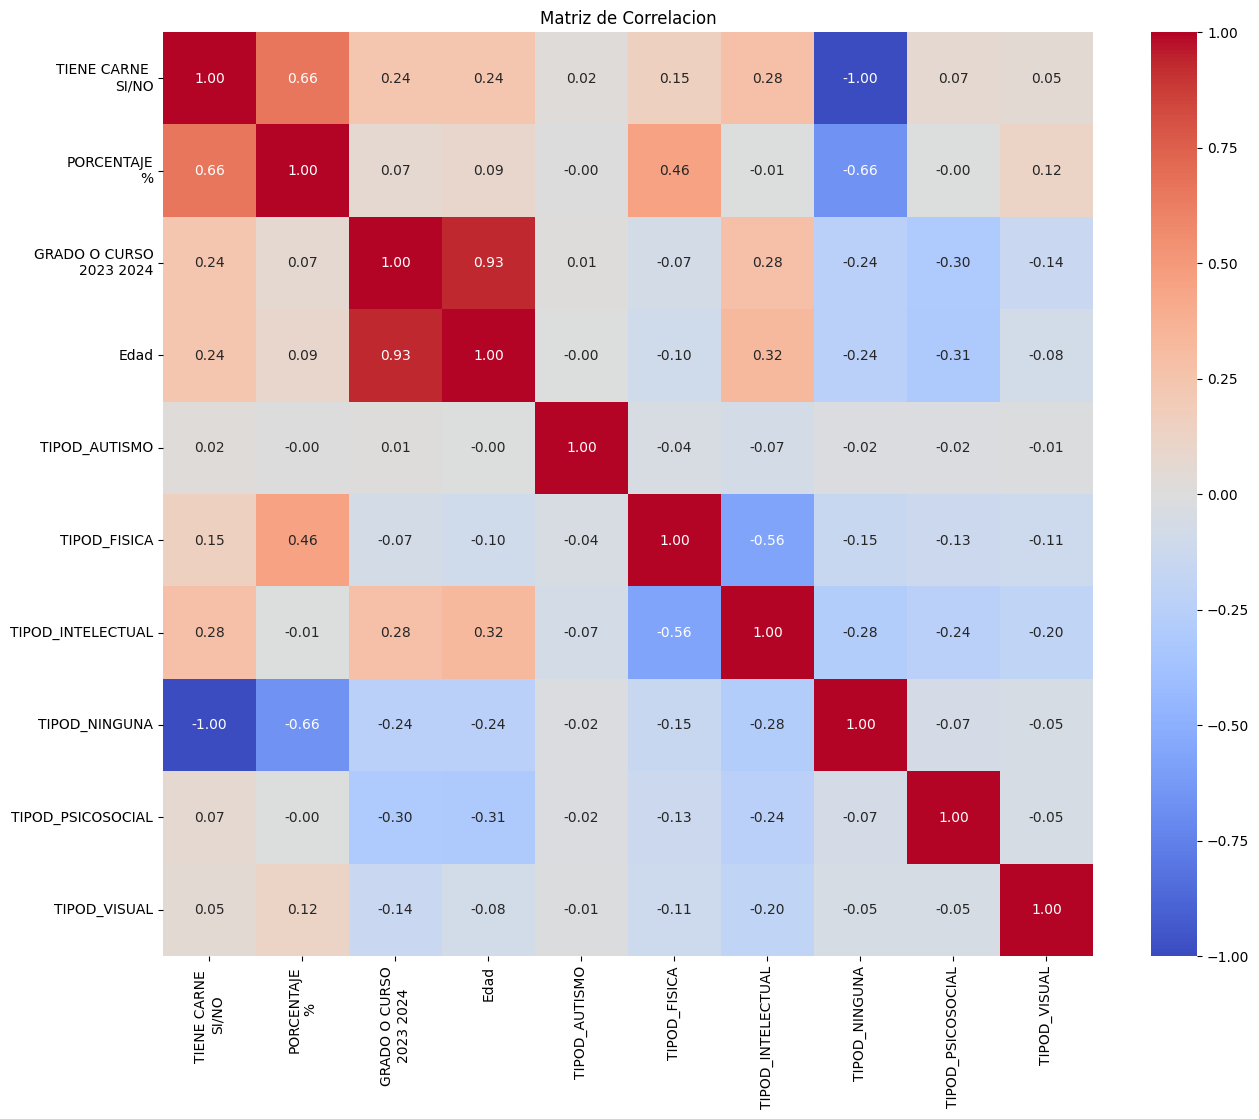

In [57]:
cov_matrix = df_new.corr()
# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlacion')
plt.show(block=True)

Se eliminia la edad ya que tiene alta correlacion

In [58]:

df_new=df_new.drop(['Edad'], axis=1) 

In [59]:
df_new.dtypes

TIENE CARNE \nSI/NO         category
PORCENTAJE\n%                float64
GRADO O CURSO\n2023 2024    category
TIPOD_AUTISMO                   bool
TIPOD_FISICA                    bool
TIPOD_INTELECTUAL               bool
TIPOD_NINGUNA                   bool
TIPOD_PSICOSOCIAL               bool
TIPOD_VISUAL                    bool
dtype: object

In [60]:

df_new['TIPOD_AUTISMO'] = df_new['TIPOD_AUTISMO'].astype(int)
df_new['TIPOD_FISICA'] = df_new['TIPOD_FISICA'].astype(int)
df_new['TIPOD_INTELECTUAL'] = df_new['TIPOD_INTELECTUAL'].astype(int)
df_new['TIPOD_NINGUNA'] = df_new['TIPOD_NINGUNA'].astype(int)
df_new['TIPOD_PSICOSOCIAL'] = df_new['TIPOD_PSICOSOCIAL'].astype(int)
df_new['TIPOD_VISUAL'] = df_new['TIPOD_VISUAL'].astype(int)

# Entrenamiento: Clustering

In [61]:
df_new

,TIENE CARNE \nSI/NO,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUTISMO,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL
0,1,0.36,0,0,0,1,0,0,0
1,1,0.36,0,0,0,1,0,0,0
2,0,0.00,0,0,0,0,1,0,0
3,1,0.36,1,0,0,1,0,0,0
4,1,0.85,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
181,1,0.35,10,0,0,1,0,0,0
182,1,0.45,13,0,0,1,0,0,0
183,1,0.58,2,0,0,0,0,0,1
184,1,0.30,11,0,1,0,0,0,0


## Normalizar

In [62]:
# Normalizar los datos


scaler = StandardScaler()
df_scaled= scaler.fit_transform(df_new)


In [63]:
df_scaled

array([[ 0.27412499, -0.74193846, -2.28217257, ..., -0.27412499,
        -0.23836565, -0.19775274],
       [ 0.27412499, -0.74193846, -2.28217257, ..., -0.27412499,
        -0.23836565, -0.19775274],
       [-3.64797099, -2.4130905 , -2.28217257, ...,  3.64797099,
        -0.23836565, -0.19775274],
       ...,
       [ 0.27412499,  0.27932113, -1.738659  , ..., -0.27412499,
        -0.23836565,  5.05682001],
       [ 0.27412499, -1.0204638 ,  0.70715206, ..., -0.27412499,
        -0.23836565, -0.19775274],
       [ 0.27412499, -0.27772955, -1.738659  , ..., -0.27412499,
        -0.23836565, -0.19775274]])

In [77]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,30):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(df_scaled)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

In [78]:
wcss

[1673.9999999999995,
 1190.231148328233,
 1165.3546832792422,
 679.3689328486834,
 546.1197468543305,
 517.7457901628699,
 340.6191529485874,
 183.24245644578002,
 136.50323228068154,
 99.33412487835622,
 85.62336388603558,
 81.41904881735428,
 74.24541284194326,
 67.10240668946382,
 65.4079286703463,
 59.54152815751275,
 53.30778282888116,
 53.772473197568004,
 47.164411786549636,
 45.097402741969226,
 40.45175989135845,
 37.51535741038801,
 38.41866833698771,
 34.65812528218348,
 32.6827371994152,
 32.687935190396246,
 30.471891307928967,
 25.012503800628465,
 26.64962073918966]

Text(0, 0.5, 'Within-cluster Sum of Squares')

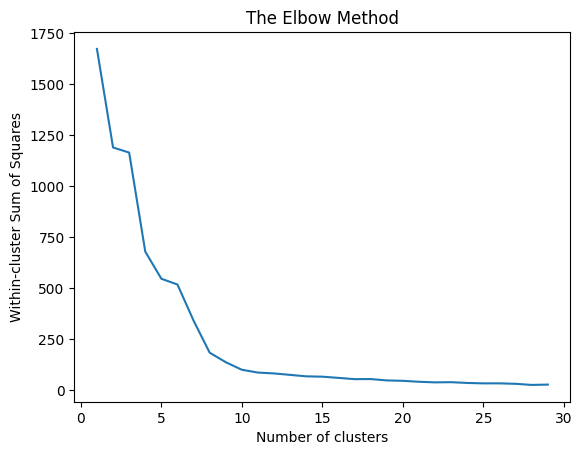

In [79]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,30)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

In [88]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(10)
# Fit the data
kmeans_new.fit(df_scaled)
# Create a new data frame with the predicted clusters
clusters_new = df_new.copy()
clusters_new['cluster'] = kmeans_new.fit_predict(df_scaled)

In [81]:
clusters_new

,TIENE CARNE \nSI/NO,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUTISMO,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL,cluster
0,1,0.36,0,0,0,1,0,0,0,8
1,1,0.36,0,0,0,1,0,0,0,8
2,0,0.00,0,0,0,0,1,0,0,2
3,1,0.36,1,0,0,1,0,0,0,8
4,1,0.85,1,0,1,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...
181,1,0.35,10,0,0,1,0,0,0,22
182,1,0.45,13,0,0,1,0,0,0,10
183,1,0.58,2,0,0,0,0,0,1,4
184,1,0.30,11,0,1,0,0,0,0,0


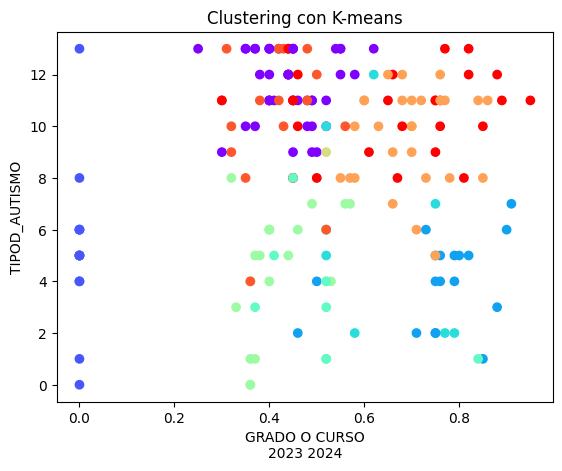

In [89]:

plt.scatter(clusters_new['PORCENTAJE\n%'], clusters_new['GRADO O CURSO\n2023 2024'], c=clusters_new['cluster'], cmap='rainbow')
plt.xlabel('GRADO O CURSO\n2023 2024')
plt.ylabel('TIPOD_AUTISMO')
plt.title('Clustering con K-means')
plt.show()